**Abstract:**

This dataset contains the hourly count of rental bike sharing between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.



**Problem Statement:**

By using the bike sharing dataset, we will peform Exploratory Data Analysis and solve the questions in the assignment. I have used the libraries like pandas, matplotlib, NumPy, seaborn.


1. Which independent variables are useful to predict a target(dependent variable)?


We import the data and identify the target variables as casual users and registered users. We then plot the correlation heat map using seaborn package and find the useful independent variables.
 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


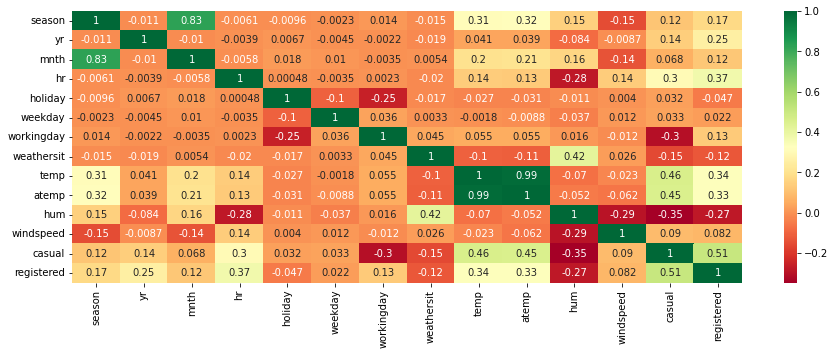

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv("drive/My Drive/hour.csv")
X = data.iloc[:,2:16]

#get correlations of each features in dataset
corrmat = X.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,5))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")



From the above heatmap it can be inferred that temp and atemp are the most useful independent variables followed by hour, humidity and working day.

2. Which independent variables have missing data? How much?

In [8]:
print(data.isna().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


From the above execution we can infer that there is no missing data.


3. Do the training and test sets have the same data?

Before training any model we follow a thumb rule of splitting the data in the ratio 8:2 for training and test sets respectively. We should ensure that records don't overlap between these sets. This is done to prevent the possible overfitting of data.

There are functions available in python which can split the data into training and testing sets.

Example- train_test_split can be imported from sklearn.model_selection 



4. Are the predictor variables independent of all the other predictor variables?

 From the above correlation heat map we can infer that (temp,atemp) and (season,month) are highly correlated. Predictor Variables cannot be independent variables if they are at all correlated. Hence we can use only one variable among each of these pairs.

5. Which predictor variables are most important?

As we have to consider only one variable among temp and atemp, we get important predictor variables as temp, hour, humidity and workingday.

6. Do the ranges of the predictor variables make sense?

In [12]:
data[['season',	'yr',	'hr',	'holiday',	'weekday',	'workingday',	'weathersit',	'temp',	'hum',	'windspeed']].describe()

,season,yr,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.627229,0.190098
std,1.106918,0.500008,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.192930,0.122340
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000
25%,2.000000,0.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.480000,0.104500
50%,3.000000,1.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.630000,0.194000
75%,3.000000,1.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.780000,0.253700
max,4.000000,1.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,0.850700


In [11]:
data[['season',	'yr',	'hr',	'holiday',	'weekday',	'workingday',	'weathersit',	'temp',	'hum',	'windspeed']].nunique()

season         4
yr             2
hr            24
holiday        2
weekday        7
workingday     2
weathersit     4
temp          50
hum           89
windspeed     30
dtype: int64

In [14]:
col=['season',	'yr',	'hr',	'holiday',	'weekday',	'workingday',	'weathersit',	'temp',	'hum',	'windspeed']
for i in col:
  print(i)
  print(data[i].unique())


season
[1 2 3 4]
yr
[0 1]
hr
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
holiday
[0 1]
weekday
[6 0 1 2 3 4 5]
workingday
[0 1]
weathersit
[1 2 3 4]
temp
[0.24 0.22 0.2  0.32 0.38 0.36 0.42 0.46 0.44 0.4  0.34 0.3  0.26 0.16
 0.14 0.18 0.12 0.28 0.1  0.08 0.06 0.04 0.02 0.52 0.56 0.58 0.6  0.48
 0.54 0.5  0.66 0.64 0.62 0.68 0.7  0.74 0.76 0.72 0.78 0.82 0.8  0.86
 0.88 0.9  0.84 0.92 0.94 0.96 0.98 1.  ]
hum
[0.81 0.8  0.75 0.86 0.76 0.77 0.72 0.82 0.88 0.87 0.94 1.   0.71 0.66
 0.57 0.46 0.42 0.39 0.44 0.47 0.5  0.43 0.4  0.35 0.3  0.32 0.64 0.69
 0.55 0.59 0.63 0.68 0.74 0.51 0.56 0.52 0.49 0.48 0.37 0.33 0.28 0.38
 0.36 0.93 0.29 0.53 0.34 0.54 0.41 0.45 0.92 0.62 0.58 0.61 0.6  0.65
 0.7  0.27 0.21 0.25 0.26 0.31 0.73 0.24 0.23 0.22 0.19 0.15 0.67 0.1
 0.08 0.12 0.14 0.13 0.17 0.16 0.18 0.96 0.2  0.85 0.   0.9  0.83 0.78
 0.84 0.89 0.79 0.97 0.91]
windspeed
[0.     0.0896 0.2537 0.2836 0.2985 0.194  0.2239 0.1343 0.1642 0.3284
 0.4478 0.3582 0.4179 0.

The predictor variables have different ranges and distributions with respect to each other. Before training a model using this data we have to normalize and standardize each feature so that the range will be inbetween 0 to 1 and have normal distribution.

7. What are the distributions of the predictor variables?

We are plotting for some predictor variables and identify the distribution.

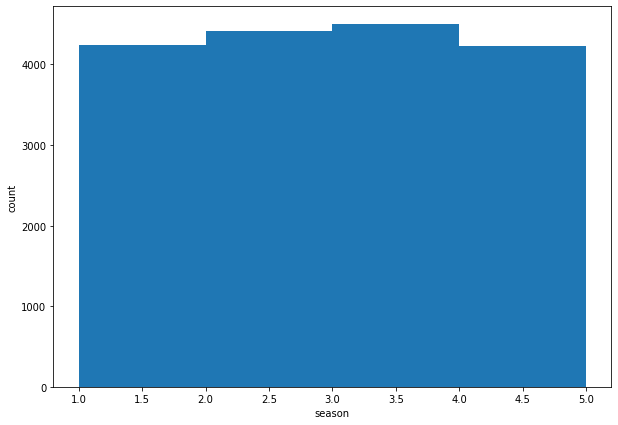

In [42]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(data['season'], bins = [1, 2, 3, 4,5])
plt.ylabel('count') 
plt.xlabel('season')
plt.show()


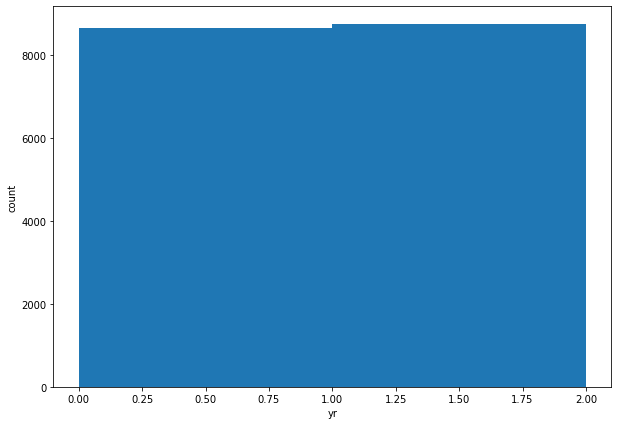

In [45]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(data['yr'], bins = [0,1, 2])
plt.ylabel('count') 
plt.xlabel('yr')
plt.show()

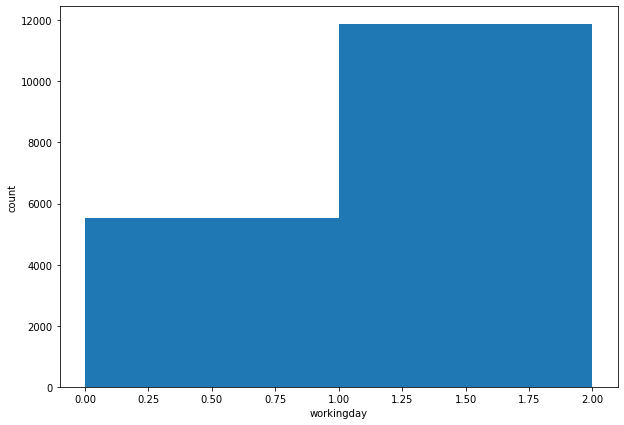

In [46]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(data['workingday'], bins = [0,1, 2])
plt.ylabel('count') 
plt.xlabel('workingday')
# Show plot
plt.show()

Citations:

[1]https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

[2]https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

[3]https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/

[4]https://www.geeksforgeeks.org/plotting-histogram-in-python-using-matplotlib/



**Copyright:**

The above subject matters are associated with an academic assignment. Anyone who wants to modify or distribute have the permission to do so.